Суми:
 Σx1 = 8
 Σx2 = 19.0
 Σy = 35.3
 Σx1^2 = 14
 Σx2^2 = 50.0
 Σx1x2 = 18.0
 Σx1y = 44.99999999999999
 Σx2y = 75.45
Коефіцієнти:
a0 = 6.450884955752213
a1 = 1.3769911504424777
a2 = -1.4380530973451338
Значення функції в точці x1 = 1.5, x2 = 3: y = 4.202212389380528
Прогнозовані значення y для кожного спостереження: [4.29380531 2.85575221 1.41769912 5.67079646 2.79469027 7.04778761
 5.60973451 5.60973451]
Сума квадратів залишків (SS_res): 82.65026548672566
Загальна сума квадратів (SS_tot): 108.06875
Середнє значення y: 4.4125
Коефіцієнт детермінації R^2: 0.23520661165484325


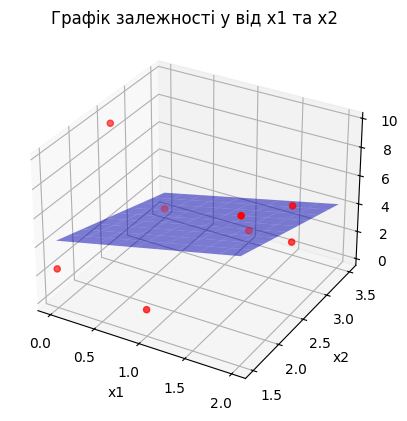

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

x1 = np.array([0, 0, 0, 1, 1, 2, 2, 2])
x2 = np.array([1.5, 2.5, 3.5, 1.5, 3.5, 1.5, 2.5, 2.5])
y = np.array([2.3, 9.4, 0.2, 1.4, 0.4, 9.7, 4.7, 7.2])

sum_x1 = np.sum(x1)
sum_x2 = np.sum(x2)
sum_y = np.sum(y)
sum_x1_squared = np.sum(x1**2)
sum_x2_squared = np.sum(x2**2)
sum_x1_x2 = np.sum(x1 * x2)
sum_x1_y = np.sum(x1 * y)
sum_x2_y = np.sum(x2 * y)

print(f'Суми:\n Σx1 = {sum_x1}\n Σx2 = {sum_x2}\n Σy = {sum_y}')
print(f' Σx1^2 = {sum_x1_squared}\n Σx2^2 = {sum_x2_squared}\n Σx1x2 = {sum_x1_x2}')
print(f' Σx1y = {sum_x1_y}\n Σx2y = {sum_x2_y}')

X = np.column_stack((np.ones(len(x1)), x1, x2))

XtX = X.T @ X
Xty = X.T @ y
a = inv(XtX) @ Xty

a0, a1, a2 = a
print(f'Коефіцієнти:\na0 = {a0}\na1 = {a1}\na2 = {a2}')

x1_test, x2_test = 1.5, 3
y_pred_test = a0 + a1 * x1_test + a2 * x2_test
print(f'Значення функції в точці x1 = 1.5, x2 = 3: y = {y_pred_test}')

y_pred = X @ a
print(f'Прогнозовані значення y для кожного спостереження: {y_pred}')

SS_res = np.sum((y - y_pred)**2)
SS_tot = np.sum((y - np.mean(y))**2)
y_mean = np.mean(y)

print(f'Сума квадратів залишків (SS_res): {SS_res}')
print(f'Загальна сума квадратів (SS_tot): {SS_tot}')
print(f'Середнє значення y: {y_mean}')

R2 = 1 - (SS_res / SS_tot)
print(f'Коефіцієнт детермінації R^2: {R2}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, color='r', label='Точки')

x1_range = np.linspace(min(x1), max(x1), 10)
x2_range = np.linspace(min(x2), max(x2), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y = a0 + a1 * X1 + a2 * X2

ax.plot_surface(X1, X2, Y, color='b', alpha=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Графік залежності y від x1 та x2')

plt.show()


In [2]:
import numpy as np

def solveLeastSquares(x1, x2, y):
    n = len(x1)

    sumX1 = sum(x1)
    sumX2 = sum(x2)
    sumY = sum(y)
    sumX1X1 = sum(x * x for x in x1)
    sumX2X2 = sum(x * x for x in x2)
    sumX1X2 = sum(x1[i] * x2[i] for i in range(n))
    sumX1Y = sum(x1[i] * y[i] for i in range(n))
    sumX2Y = sum(x2[i] * y[i] for i in range(n))


    A = np.array([[n, sumX1, sumX2],
                  [sumX1, sumX1X1, sumX1X2],
                  [sumX2, sumX1X2, sumX2X2]])
    
    B = np.array([sumY, sumX1Y, sumX2Y])


    def gauss(A, B):
        n = len(B)
        for i in range(n):
           
            maxRow = i
            for k in range(i + 1, n):
                if abs(A[k][i]) > abs(A[maxRow][i]):
                    maxRow = k

            A[[i, maxRow]] = A[[maxRow, i]]
            B[i], B[maxRow] = B[maxRow], B[i]

            for k in range(i + 1, n):
                factor = A[k][i] / A[i][i]
                B[k] -= factor * B[i]
                A[k, i:] -= factor * A[i, i:]

        
        x = np.zeros(n)
        for i in range(n - 1, -1, -1):
            x[i] = (B[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i][i]
        return x

    
    a0, a1, a2 = gauss(A, B)

    print(f"a0 = {a0:.2f}")
    print(f"a1 = {a1:.2f}")
    print(f"a2 = {a2:.2f}")


x1 = [0, 0, 0, 1, 1, 2, 2, 2]
x2 = [1.5, 2.5, 3.5, 1.5, 3.5, 1.5, 2.5, 2.5]
y = [2.3, 9.4, 0.2, 1.4, 0.4, 9.7, 4.7, 7.2]

solveLeastSquares(x1, x2, y)


a0 = 6.45
a1 = 1.38
a2 = -1.44
